<a href="https://colab.research.google.com/github/autodub/khabri-assignment/blob/main/khabri_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi Label Text Classification**
###**Introduction** 
In this Notebook we will be fine tuning a transformer model for the Multilabel text classification problem. This is one of the most common business problems where a given piece of text /sentence /document needs to be classified into one or more of categories out of the given list.



#### **Importing Python Libraries and preparing the environment**
Before we start the project let's install some required libraries.<br />
Many libraries are preinstalled on Google Colab. We will install some extra libraries and latest version of Tensorflow.

In [ ]:
#######################################
### -------- Install libraries ------- ###

## Install Tensorflow, HuggingFace Transformers, contractions

!pip install --upgrade tensorflow
!pip install contractions
!pip install transformers

## Just to cross check whether tensorflow and transformers libraries are installed 
#!python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
#!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

     |████████████████████████████████| 320.4MB 55kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 317kB 3.8MB/s 
     |████████████████████████████████| 245kB 17.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81701 sha256=10e2b48da31b77e48c30f2b255c4b30f5c23d19389566c4411adc299f4fcd383
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 2.9MB 16.5MB/s 
     |████████████████████████████████| 890kB 26.9MB/s 
     |████████████████████████████████| 1.1MB 36.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=34ccb797cf6948b561d6de24c8da0d4751ce3957b5e00abe2ee2aecc0b72f70b
  S

#### Download Datset
Before getting started we will first we will upload the dataset into this environment. <br />
How did I extract dataset into Colab environment?<br/>
We can do this by, either uploading the dataset into drive or github and downloading from drive or github.<br/>
I pushed the dataset into github repo https://github.com/autodub/khabri-assignment.git. Later downloaded and extracted it into "data" folder.

In [ ]:
#######################################
### -------- Load Dataset ------- ###
# 1. Upload dateset to github
# 2. Download it from github
# 3. Create a folder "data", extract and store the dataset in "data" directory 
!git clone https://github.com/autodub/khabri-assignment.git
!mkdir data
!unzip khabri-assignment/coding_evaluation_khabri.zip -d data/

## Mount gDrive
# from google.colab import drive
# drive.mount('/content/drive')

Cloning into 'khabri-assignment'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (13/13), done.
Archive:  khabri-assignment/coding_evaluation_khabri.zip
  inflating: data/train.csv          
  inflating: data/test_labels.csv    
  inflating: data/test.csv           


#### Import Libraries
>  Data Analysis & Visualization
>> Pandas <br />
>> Numpy <br />
>> Matplotlib <br />
>> Seaborn <br />
>> Wordcloud <br />

> Miscellaneous
>> Warnings <br />
>> os <br />
>> Time

> Text Processing
>> Contractions <br />
>> Sklearn

> Deep Learning
>> Transformers (HuggingFace) <br />
>> Tensorflow 2.0

In [ ]:
#######################################
### -------- Load libraries ------- ###

#Data Analysis libraries
#basic
import pandas as pd 
import numpy as np
#miscellaneous
import warnings
warnings.filterwarnings("ignore")
from os import path
import time
import scipy.stats as ss
#visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib_venn as venn
%matplotlib inline
#warnings & error handling
# start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")


# Text processing
import contractions
from sklearn.model_selection import train_test_split

# Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast

# tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import to_categorical



#### **Exploratory Data Analysis**
##### **Data OverView**
The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 1.5 lakh comments from discussions relating to user pages and articles dating from 2004-2015.<br/>
Human raters classified the text into 6 classes,


*   c1
*   c2
*   c3
* c4
* c5
* c6 <br/>

We will understand and explore more about the data in next cells.

In [ ]:
#######################################
### --------- Data Analysis --------- ###

# Import data from csv
data = pd.read_csv("data/train.csv",index_col="id",header=0)  # used id as row index
dataViz = pd.read_csv("data/train.csv",index_col="id",header=0)    #dataViz is used for visualization
test_data = pd.read_csv("data/test.csv",index_col="id",header=0)
test_labels = pd.read_csv("data/test_labels.csv",index_col="id",header=0)

# Take a look at dataset
#data shape
print("Number of Rows: %s"%(dataViz.shape[0]))
print("Columns       :",end=" ")
for eachCol in dataViz.columns:
  print(eachCol, end=" ")
print("\n")

# First 5 rows
print("First 5 rows ")
dataViz.head(5)   

Number of Rows: 159571
Columns       : text c1 c2 c3 c4 c5 c6 

First 5 rows 


,text,c1,c2,c3,c4,c5,c6
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Missing Values
Before any analysis, first check for any missing values. <br/>
If missing values are  very low compared to data size just remove those rows(or data records). <br/>
If missing values are reasonably more then we use should look at a way to fill those values. Generally,
> If it's a text field replace empty space with NaN.<br/> If it's a numeric field replace it with some statistics techniques like mean,median or mode.

We are lucky our data is perfect with 0 missing values.







In [ ]:
print("Check for missing values in Train dataset")
null_check=data.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test_data.isnull().sum()
print(null_check)
print("Check for missing values in Test Labels dataset")
null_check=test_labels.isnull().sum()
print(null_check)

Check for missing values in Train dataset
text    0
c1      0
c2      0
c3      0
c4      0
c5      0
c6      0
dtype: int64
Check for missing values in Test dataset
text    0
dtype: int64
Check for missing values in Test Labels dataset
c1    0
c2    0
c3    0
c4    0
c5    0
c6    0
dtype: int64


Stats & Visualization: <br/>
> Total number of samples in train.csv : 159571 <br/>
Most of the text is not classified into any of the 6 classes (noClass).  "noClass" : 143346 <br/>
Text belongs to atleast one class : 16225

In [ ]:
try:
  dataViz =  dataViz.drop(['noClass'],axis=1)
except:
  pass
x=dataViz.iloc[:,1:].sum()
#marking comments without any tags as "noClass"
rowsums=dataViz.iloc[:,1:].sum(axis=1)
dataViz['noClass']=(rowsums==0)
#count number of clean entries
print("Total data points = ",len(dataViz))
print("Total data points labeled as '0' in all classes        = ",dataViz['noClass'].sum())
print("Total data points labeled as '1' in atleast one class  =",len(dataViz)-dataViz['noClass'].sum())

Total data points =  159571
Total data points labeled as '0' in all classes        =  143346
Total data points labeled as '1' in atleast one class  = 16225


#### Class Imbalance: <br/>
Our dataset is imbalance with 89.8% of samples belong to no class.<br/>
> c1 : 9.58 %<br/>
> c2 : 0.99 %<br/>
> c3 : 5.29 %<br/>
> c4 : 0.29 %<br/>
> c5 : 4.9 %<br/>
> c6 : 0.88 %<br/>

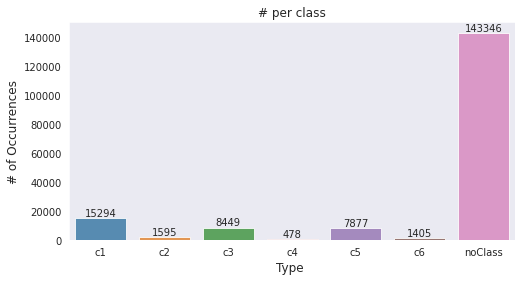

In [ ]:
x=dataViz.iloc[:,1:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Wordclouds - Frequent words
Now, let's take a look at words that are associated with these classes. <br/>
The visuals here are word clouds (ie) more frequent words appear bigger in the plot below.<br/>
Some intresting facts can be drawn from this plot,<br/>
> Few words are commnly repeated in all the classes <br/>
> classes c5 and c6 have exactly same plot, because text classified as c6 ar also classified as c5.  
> Classes c1-c2 & c5-c6 have many similar words. <br/>

In the next cells we will find the co-relation between c1-c2 & c5-c6.

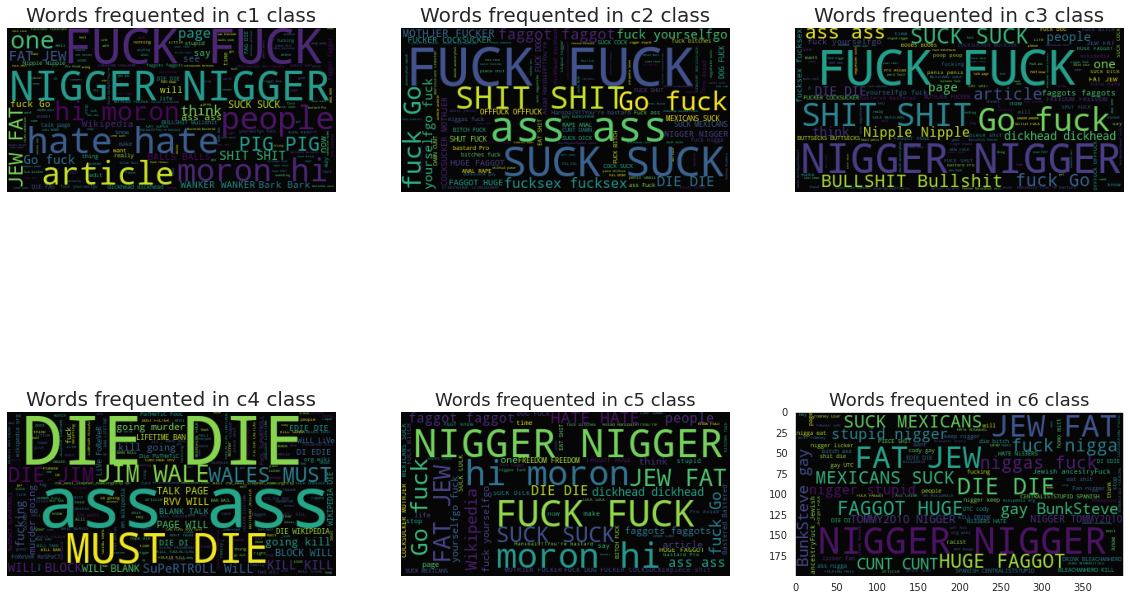

In [ ]:
# Look at what words are asscoiated with each of these classes
stopwords = set(STOPWORDS)

c1_text_dataFrame = dataViz[dataViz["c1"]==1]
c1_text = " ".join(eachText for eachText in c1_text_dataFrame.text)
c1_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c1_text)
plt.figure(figsize=(20,20))
# plt.imshow(c1_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,1)
plt.title("Words frequented in c1 class", fontsize=20)
plt.imshow(c1_wordcloud,alpha=0.98)

c2_text_dataFrame = dataViz[dataViz["c2"]==1]
c2_text = " ".join(eachText for eachText in c2_text_dataFrame.text)
c2_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c2_text)
# plt.imshow(c2_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,2)
plt.title("Words frequented in c2 class", fontsize=20)
plt.imshow(c2_wordcloud,alpha=0.98)

c3_text_dataFrame = dataViz[dataViz["c3"]==1]
c3_text = " ".join(eachText for eachText in c3_text_dataFrame.text)
c3_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c3_text)
# plt.imshow(c3_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,3)
plt.title("Words frequented in c3 class", fontsize=20)
plt.imshow(c3_wordcloud,alpha=0.98)

c4_text_dataFrame = dataViz[dataViz["c4"]==1]
c4_text = " ".join(eachText for eachText in c4_text_dataFrame.text)
c4_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c4_text)
# plt.imshow(c4_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,4)
plt.title("Words frequented in c4 class", fontsize=20)
plt.imshow(c4_wordcloud,alpha=0.98)

c5_text_dataFrame = dataViz[dataViz["c5"]==1]
c5_text = " ".join(eachText for eachText in c5_text_dataFrame.text)
c5_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c5_text)
# plt.imshow(c5_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,5)
plt.title("Words frequented in c5 class", fontsize=18)
plt.imshow(c5_wordcloud,alpha=0.98)

c6_text_dataFrame = dataViz[dataViz["c6"]==1]
c6_text = " ".join(eachText for eachText in c6_text_dataFrame.text)
c6_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(c6_text)
# plt.imshow(c6_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplot(3,3,6)
plt.title("Words frequented in c6 class", fontsize=18)
plt.imshow(c6_wordcloud,alpha=0.98)


### Correlation between classes:
We used cramers method to find correlation between classes because these columns are binary. <br/>
Distance based correlation methods does not work well on binary data.<br/>
Carmers value close to 0 are more correlated, colse to 1 and -1 are not correlated 
> Correlation between c1-c2 is : 0.308 <br/>
> Correlation between c5-c6 is : 0.337 <br/>



In [ ]:
# took this code from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix/39266194
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [ ]:
temp_df=dataViz.iloc[:,1:-1]
def calculateCorelationBetweenClasses(col1,col2):
  confusion_matrix = pd.crosstab(temp_df[col1], temp_df[col2])
  print("Confusion matrix between %s and %s:"%(col1, col2))
  print(confusion_matrix)
  new_corr=cramers_corrected_stat(confusion_matrix)
  print("The correlation between %s and %s using Cramer's stat="%(col1,col2),new_corr)

calculateCorelationBetweenClasses("c1","c2")
calculateCorelationBetweenClasses("c5","c6")
#try to mention that c6 1 are c5 1


Confusion matrix between c1 and c2:
c2       0     1
c1              
0   144277     0
1    13699  1595
The correlation between c1 and c2 using Cramer's stat= 0.30850290540548614
Confusion matrix between c5 and c6:
c6       0     1
c5              
0   151449   245
1     6717  1160
The correlation between c5 and c6 using Cramer's stat= 0.33757319620446136


### **Feature Engineering**
There are 8 columns in data. <br/>
id, text, c1, c2, c3, c4, c5, c6 <br/>
> id :  Used it as index. <br/>
> text: This column has wikipedia comments. <br/>
> c1 to c6 : Binary labels 0 or 1. 

##### Text Processing
Since id is index no feature engineering is done to this column.<br/>
"text" column has text(wiki comments) data, we apply some preprocessing to clean it.
1. Removing misleading data<br/>
"text" column contain identifier information like **IP, username, time stamps..**. . We can leave it as it is but we are 100% sure that they are no way related to predict the class, they might certainly misleads our model.<br/>
1. De-contraction <br/>
De-contracting words like, <br/>
you've --> you have <br/>
you're --> you are <br/>
99% of contracted words are decontracted.
2. Removing new lines, mysterious numbers and hyperlinks.<br/>

2. Tokenization <br/>
We use **WordPiece** tokenizer. It works better than regular tokenizers because wordpiece breaks words into sub words and then assigns ids for each sub word from it's dictionary of 30,000 words. If any new word appears it is mapped as [UKN]. <br/>
The reason I used word peice is it is trained on wiki corpus and it breaks a word into atleast 2 sub words, so in most of the cases it breaks a unkown word into possible known words(words present in vocab dict). 

2. One Hot encoding<br/>
Generally we apply one hot encoding on labels(c1 to c6). It;s not necessary in our case because already data is in binary numbers.
2. Log Transformations <br/>
It is applied on numeric data when the number range is large(Ex:[1,2, 991, 12567903] 2-1=1, 12567903-991=12566912 ). So log Transformation brings this data to some definet range.<br/>
No Log Transformation is applied because of our binary labels.
2. Binning <br/>
Binning is used to avoid overfitting the data. Helps in fitting the model easily. It makes the model tolerant from noisy data values.<br/>
 <br/>


Advanced feature engineering techniques like splitting, scaling, changing dimensions... are not used because deep learning models are very intelligent that they split and change dimensions way better than human decision.


In [ ]:
#######################################
### --------- Text Processing ---------- ###
# 1. De-contractions of text column
def deContraction(x):
  try:
    return contractions.fix(x)
  except:
    return x
data['text'] = data.applymap(deContraction)

# 2. Remove new lines from text column
data['text'] = data['text'].replace('\n',' ', regex=True)

# 3. Remove Ip addresses from text data
data['text'] = data['text'].str.replace(r'[0-9]+(?:\.[0-9]+){3}', ' ', regex=True)

# 4. Remove Time & time stamps
data['text'] = data['text'].str.replace(r'[0-9]+[:][0-9]+', '', regex=True)

# 5. Remove digits from text column
# data['text'] = data['text'].str.replace('\d+', ' ', regex=True)

# 6. Remove special chars and repeated chars
try:
  data['text'] = data['text'].str.replace("[@,#,$,%,*]", ' ', regex=True)
except:
  print("Error in removing special characters from text")

# 7. Remove data between < > along with tags
try:
  data['text'] = data['text'].str.replace(r'<.*>', '', regex=True)
except:
  print("Error in removing data between < >")

# 8. Remove mysterious numbers
try:
  data['text'] = data['text'].str.replace(r'[0-9]{5,}', '', regex=True)
except:
  print("Error in removing mysterious numbers from text data")

# Could not achieve removing usernames, irregular time

####Splitting data: Training and Validation.
Split the data into Training and Validation in 80:20 ratio.<br/>
Why 80:20 ?<br/>
Validation does not require much data. For large datasets we can use either 75:25 or 80:20 or 85:15. <br/>
Training Data shape (127656, 7)<br/>
Validation Data shape (31915, 7)

In [ ]:
# Split into train and evaluation - stratify over Issue
data_train, data_validation = train_test_split(data, test_size = 0.2)
print("Training Data shape %s Validation Data shape %s"%(data_train.shape,data_validation.shape))


Training Data shape (127656, 7) Validation Data shape (31915, 7)


### **Model**
Model Used : bert-base-uncased <br/>


What is BERT? <br/>
Bidirectional Encoder Representations from Transformers <br/>
BERT is a language model. State-of-the-art results are achieved in a wide variety of NLP tasks.  (Text Classification is one among them.)<br/>


How BERT works?<br/>
It makes use of Transformers and attention mechanism, that learns contextual relations between words (or sub-words) in a text.<br/>

We use bert-base-uncased <br/>
bert-base has 12 Transformer layers with 110Million parameters.
-uncased means it treats capital and small letters in the same way.<br/>
 english == English == ENGLISH. <br/>

But why BERT ?<br/>
1. Quicker Development(thanks to HuggingFace).
2. Less data required(because it's already trained we just need to finetune it).
3. Better Results.
4. BERT Model is trained on wiki corpus. And our data set is also from wiki corpus(wiki comments).<br/>
Rule of Thumb is fine tuning data and pre-trained data are similar then the model performs faster asd better.<br/>

Disadvantages of BERT:
1. Very compute-intensive. Even fine tuning takes long time.

BERT Architecture<br/>
12 layers : Transformer +Attention.<br/>
Paramerets: 110Million. <br/>
Model size: 536MB


In [ ]:
#######################################
### --------- Setup BERT ---------- ###
# Name of the BERT model to use///
model_name = 'bert-base-uncased'
# Max length of tokens
max_length = 100 #512
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False
# print(config)
# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### **Model Architecutre**
The output layers of bert are inputed to finetune layers to predict output( 0 or 1).<br/>
Finetune layer just consists of simple neural net with 1500 paramerets.
Each class c1 to c6 has its own FT layer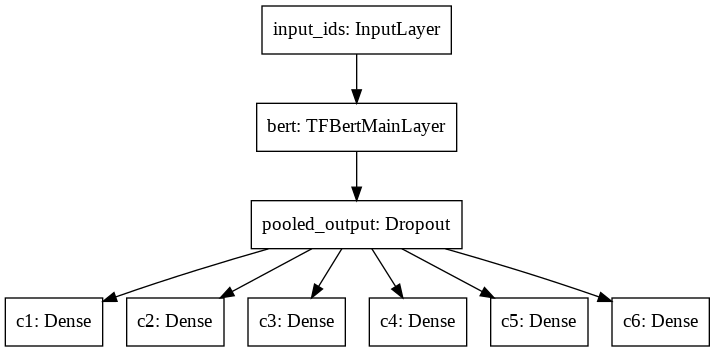

In [32]:
#######################################
### ------- Build the model ------- ###
# TF Keras documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model
# Load the MainLayer
bert = transformer_model.layers[0]
# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}
# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)
# Then build your model output
c1 = Dense(units=len(data.c1.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c1')(pooled_output)
c2 = Dense(units=len(data.c2.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c2')(pooled_output)
c3 = Dense(units=len(data.c3.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c3')(pooled_output)
c4 = Dense(units=len(data.c4.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c4')(pooled_output)
c5 = Dense(units=len(data.c5.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c5')(pooled_output)
c6 = Dense(units=len(data.c6.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='c6')(pooled_output)
outputs = {'c1': c1, 'c2': c2,'c3' : c3,'c4' : c4,'c5' : c5,'c6' : c6 } #'last_sigmoid':last_sigmoid
# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')
# Take a look at the model
print(model.output_shape)
model.summary()

{'c1': (None, 2), 'c2': (None, 2), 'c3': (None, 2), 'c4': (None, 2), 'c5': (None, 2), 'c6': (None, 2)}
Model: "BERT_MultiLabel_MultiClass"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          ((None, 100, 768), ( 109482240   input_ids[0][0]                  
__________________________________________________________________________________________________
pooled_output (Dropout)         (None, 768)          0           bert[3][1]                       
__________________________________________________________________________________________________
c1 (Dense)                      (None, 2)            1538        pool

1. Optimizer : Adam <br/>
2. Loss : BinaryCrossentropy <br/>
Categorical entropies does not work for multilabel classification.
3. Accuracy Metrics: Categorical Accuracy
It calculates accuracy for each class in a data record. wroks fine for Multi label<br/>
Before fitting the model we will preprocess the text and labels <br/>
Text --> numeric (using wordpiece tokenizer)<br/>
labels (c1-c6) -- > categorical<br/>
0 --> [0,1]<br/>
1 --> [1,0] <br/>


In [67]:
#######################################
### ------- Train the model ------- ###
# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'c1': BinaryCrossentropy(from_logits = True), 'c2': BinaryCrossentropy(from_logits = True),
        'c3': BinaryCrossentropy(from_logits = True), 'c4': BinaryCrossentropy(from_logits = True),
        'c5': BinaryCrossentropy(from_logits = True), 'c6': BinaryCrossentropy(from_logits = True)}
metric = {'c1': CategoricalAccuracy('accuracy'), 'c2': CategoricalAccuracy('accuracy'),
          'c3': CategoricalAccuracy('accuracy'), 'c4': CategoricalAccuracy('accuracy'),
          'c5': CategoricalAccuracy('accuracy'), 'c6': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

# Ready output data for the model
y_c1 = to_categorical(data['c1'])
y_c2 = to_categorical(data['c2'])
y_c3 = to_categorical(data['c3'])
y_c4 = to_categorical(data['c4'])
y_c5 = to_categorical(data['c5'])
y_c6 = to_categorical(data['c6'])


# Tokenize the input (takes some time)
x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

### Fitting the model.
1. batch_size: 64 
<br/>
We can even take higher batch sizes like 256, 512.. but due to compute constraines in this environment higher batch sizes returns error. <br/>
2. epochs: 2 <br/>
Each epoch took 55 minutes to train <br/>
Training for some more epochs yields more better accuracies. <br/>

Check the loss, accuracies in the below cell.

We fitted this model twice,
> Once without preprocessing data <br/>
>> The converged loss : 0.315<br/>


> Once with preprocessing data<br/>
>> The converged loss: 0.254

#### Hyperparamerets :<br/> 
> Max length of text input to tokenizer : 100 <br/>
batch_size=64<br/>
validation_split=0.2<br/>
epochs = 2 <br/>
Adam
>>learning_rate=5e-05,<br/>
  epsilon=1e-08,<br/>
  decay=0.01,<br/>
  clipnorm=1.0<br/>
 


In [ ]:
# Fit the model
history = model.fit(
    # x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    x={'input_ids': x['input_ids']},
    y={'c1': y_c1, 'c2': y_c2,'c3': y_c3, 'c4': y_c4,'c5': y_c5, 'c6': y_c6},
    validation_split=0.2,
    batch_size=64,
    epochs=2)


Epoch 1/2
1995/1995 [==============================] - 2910s 1s/step - loss: 0.3757 - c1_loss: 0.1183 - c2_loss: 0.0346 - c3_loss: 0.0739 - c4_loss: 0.0257 - c5_loss: 0.0826 - c6_loss: 0.0406 - c1_accuracy: 0.9592 - c2_accuracy: 0.9893 - c3_accuracy: 0.9763 - c4_accuracy: 0.9950 - c5_accuracy: 0.9705 - c6_accuracy: 0.9907 - val_loss: 0.2745 - val_c1_loss: 0.0871 - val_c2_loss: 0.0236 - val_c3_loss: 0.0525 - val_c4_loss: 0.0150 - val_c5_loss: 0.0650 - val_c6_loss: 0.0314 - val_c1_accuracy: 0.9671 - val_c2_accuracy: 0.9910 - val_c3_accuracy: 0.9800 - val_c4_accuracy: 0.9971 - val_c5_accuracy: 0.9721 - val_c6_accuracy: 0.9904
Epoch 2/2
1995/1995 [==============================] - 2911s 1s/step - loss: 0.2540 - c1_loss: 0.0801 - c2_loss: 0.0229 - c3_loss: 0.0483 - c4_loss: 0.0143 - c5_loss: 0.0601 - c6_loss: 0.0283 - c1_accuracy: 0.9701 - c2_accuracy: 0.9904 - c3_accuracy: 0.9819 - c4_accuracy: 0.9970 - c5_accuracy: 0.9748 - c6_accuracy: 0.9915 - val_loss: 0.2601 - val_c1_loss: 0.0851 - va

Training Loss:
>-loss: 0.2540 <br/>- c1_loss: 0.0801 <br/>- c2_loss: 0.0229 <br/>- c3_loss: 0.0483 <br/>- c4_loss: 0.0143 <br/>- c5_loss: 0.0601 <br/>- c6_loss: 0.0283

Training Accuracy:
>c1_accuracy: 0.9701 <br/>- c2_accuracy: 0.9904 <br/>- c3_accuracy: 0.9819 <br/>- c4_accuracy: 0.9970 <br/>- c5_accuracy: 0.9748 <br/>- c6_accuracy: 0.9915<br/>


Saved the model checkpoint to drive.<br/>
Approx 1.5 GB size

In [68]:
# model.save("2_epoch.h5")

## load the model from drive
# uncomment if you wanted to use saved model.
# from google.colab import drive
# drive.mount('/content/gdrive')

# model_path = "/content/gdrive/My Drive/ajvc/2_epochs.h5"
# from tensorflow import keras
# import tensorflow
# model = loaded_model = tensorflow.keras.models.load_model(model_path)

Mounted at /content/gdrive


In [71]:
#######################################
### ----- Evaluate the model ------ ###
# load test datasets
test_data = pd.read_csv("data/test.csv",index_col="id",header=0)
test_labels = pd.read_csv("data/test_labels.csv",index_col="id",header=0)

#changes in test data
test_labels = test_labels.replace(to_replace=-1,value=0)

# sort test_data & test_labels based on id
test_data = test_data.sort_index(axis = 0) 
test_labels = test_labels.sort_index(axis = 0) 

test_data.shape

(153164, 1)

### **Evaluation**
Model is evaluated on test dataset. <br/>
#####Loss:<br/> 
loss: 1.0373 - c1_loss: 0.5040 - c2_loss: 0.0299 - c3_loss: 0.2562 - c4_loss: 0.0128 - c5_loss: 0.2041 - c6_loss: 0.0303

##### Accuracy: <br/>
c1_accuracy: 0.8009 - c2_accuracy: 0.9935 - c3_accuracy: 0.8847 - c4_accuracy: 0.9986 - c5_accuracy: 0.8904 - c6_accuracy: 0.9949

In [70]:


# Ready test data
test_y_c1 = to_categorical(test_labels['c1'])
test_y_c2 = to_categorical(test_labels['c2'])
test_y_c3 = to_categorical(test_labels['c3'])
test_y_c4 = to_categorical(test_labels['c4'])
test_y_c5 = to_categorical(test_labels['c5'])
test_y_c6 = to_categorical(test_labels['c6'])

test_x = tokenizer(
    text=test_data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)

# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids']},
    y={'c1': test_y_c1, 'c2': test_y_c2,'c3': test_y_c3, 'c4': test_y_c4,'c5': test_y_c5, 'c6': test_y_c6}
)


### **Comparision**
There are many Text classification techniques,<br/>
>Naive Bayes Classifier,
Linear Classifier,
Support Vector Machine,
Bagging Models,
Boosting Models,
Shallow Neural Networks,

>Deep Neural Networks
>>Convolutional Neural Network (CNN),
Long Short Term Modelr (LSTM),
Gated Recurrent Unit (GRU),
Bidirectional RNN,
Recurrent Convolutional Neural Network (RCNN),
Other Variants of Deep Neural Networks,

Many of these models work fine for Text classification. But when you compare it with BERT, it outperforms all the current existing models.<br/>
Our accuracies vary from 80% to 99% for 6 classes. <br/>
95%+ accuracies can be achieved if we train our model further.

### **Drawbacks**
1. Preprocessing <br/>
Could not remove usernames and irregular time(Ex: January 11 20, 11 Feb 2004 ..)

2. Could not Graph loss and accuracy of model fitting and evaluation <br/>
Because this environment has only 12GB RAM and the main process(fitting or evaluating) was consuming the entire space, so could not run plotting on it.

3. Each epoch took 50 min to train(I assumed it would take 15 to 20 min).